# **Code 1**

In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import sklearn.metrics as sk_metrics
import seaborn as sns
import pathlib

from imgaug import augmenters as iaa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from random import randint

In [2]:
!gdown --id 1_nAzj3KpPKI4pye-12hIl7kXCtw9SYJx

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_nAzj3KpPKI4pye-12hIl7kXCtw9SYJx
To: /content/WildfireDataset.zip
100% 7.61M/7.61M [00:00<00:00, 19.3MB/s]


In [3]:
!unzip WildfireDataset.zip

Archive:  WildfireDataset.zip
   creating: WildfireDataset/nosmoke/
  inflating: WildfireDataset/nosmoke/002199.jpg  
  inflating: WildfireDataset/nosmoke/002219.jpg  
  inflating: WildfireDataset/nosmoke/002233.jpg  
  inflating: WildfireDataset/nosmoke/002258.jpg  
  inflating: WildfireDataset/nosmoke/002279.jpg  
  inflating: WildfireDataset/nosmoke/002301.jpg  
  inflating: WildfireDataset/nosmoke/004636.jpg  
  inflating: WildfireDataset/nosmoke/004637.jpg  
  inflating: WildfireDataset/nosmoke/004638.jpg  
  inflating: WildfireDataset/nosmoke/004643.jpg  
  inflating: WildfireDataset/nosmoke/004644.jpg  
  inflating: WildfireDataset/nosmoke/004645.jpg  
  inflating: WildfireDataset/nosmoke/004646.jpg  
  inflating: WildfireDataset/nosmoke/004648.jpg  
  inflating: WildfireDataset/nosmoke/004649.jpg  
  inflating: WildfireDataset/nosmoke/004651.jpg  
  inflating: WildfireDataset/nosmoke/004655.jpg  
  inflating: WildfireDataset/nosmoke/004662.jpg  
  inflating: WildfireDataset/nos

In [4]:
!ls WildfireDataset

nosmoke  smoke


In [5]:
import pathlib
data_dir = '/content/WildfireDataset'
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

300


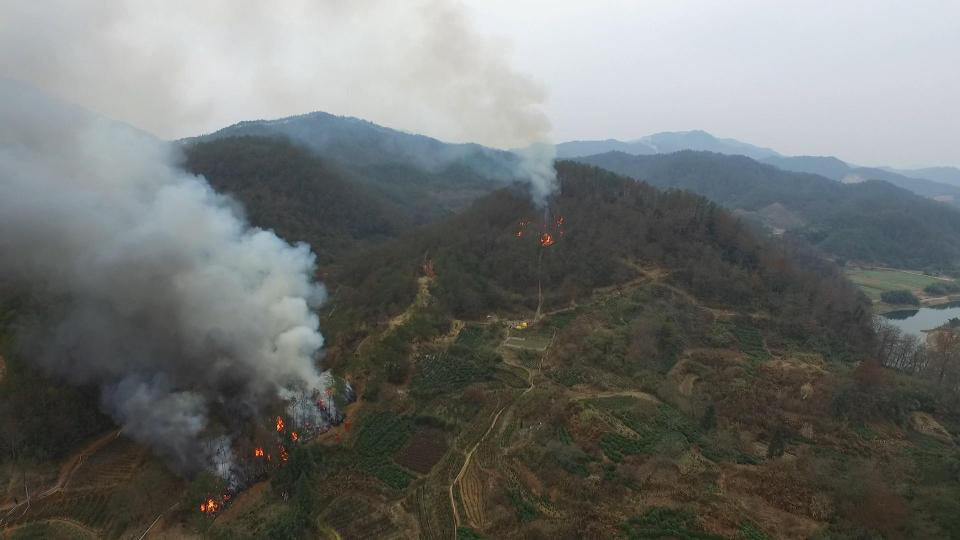

In [10]:
smoke = list(data_dir.glob('smoke/*'))
PIL.Image.open(str(smoke[0]))

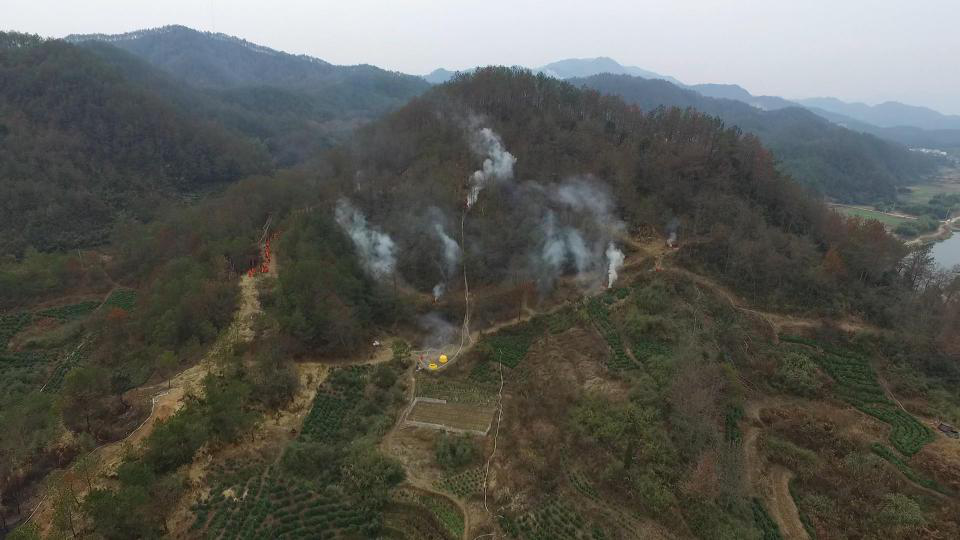

In [11]:
PIL.Image.open(str(smoke[1]))

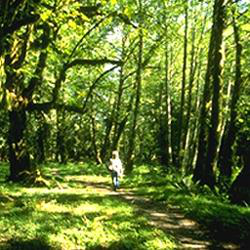

In [ ]:
nosmoke = list(data_dir.glob('nosmoke/*'))
PIL.Image.open(str(nosmoke[0]))

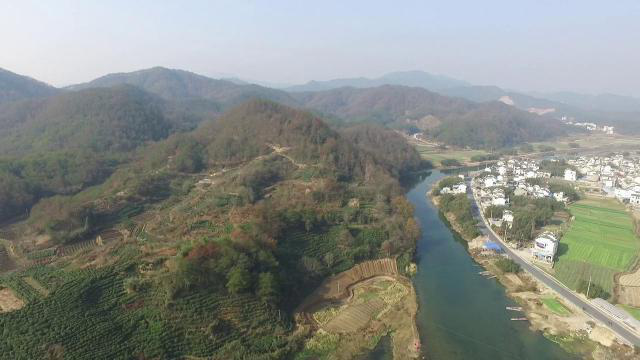

In [ ]:
PIL.Image.open(str(nosmoke[1]))

In [12]:
batch_size = 32
img_height = 300
img_width  = 300

In [13]:
train_set = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_set = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 2 classes.
Using 225 files for training.
Found 300 files belonging to 2 classes.
Using 75 files for validation.


In [14]:
class_names = train_set.class_names
print(class_names)

['nosmoke', 'smoke']


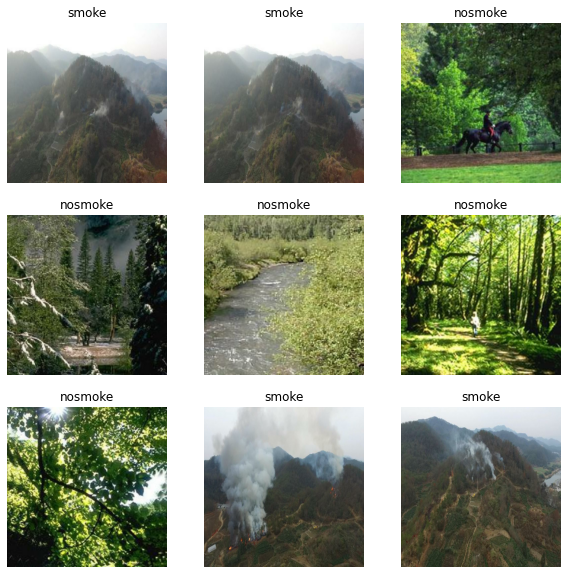

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [16]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [17]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
normalized_ds = train_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print((np.min(first_image) + np.max(first_image))/2)

0.5261043310165405


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [21]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [22]:
model.fit(
  train_set,
  validation_data=val_set,
  epochs=3
)

Epoch 1/3
8/8 [==============================] - 11s 168ms/step - loss: 0.9363 - accuracy: 0.7156 - val_loss: 0.4418 - val_accuracy: 0.9200
Epoch 2/3
8/8 [==============================] - 1s 72ms/step - loss: 0.3818 - accuracy: 0.8444 - val_loss: 0.2758 - val_accuracy: 0.8533
Epoch 3/3
8/8 [==============================] - 1s 73ms/step - loss: 0.2747 - accuracy: 0.8489 - val_loss: 0.2393 - val_accuracy: 0.8667


# **Results**

In [26]:
img = keras.preprocessing.image.load_img(
    "/content/WildfireDataset/smoke/000163.jpg", target_size=(img_height, img_width ))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% nosmoke and {100 * score:.2f}% smoke.")

1/1 [==============================] - 0s 30ms/step


TypeError: ignored

In [24]:
# Model Summary
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

NameError: ignored

In [25]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

NameError: ignored